---
title: Multiple Linear Regression and Evaluation
author: Alexa Dandridge
format:
    html:
        embed-resources: true
        code-line numbers: true

---
**GitHub Repository** <https://github.com/alexadandridge/Positron-Class-Week-0->

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
# Importing the data set and packages
pip install palmerpenguins
import palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np

In [2]:
# Loading in the dataframe
dat = load_penguins()
dat.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Dropping the rows in the dataframe that have missing values
dat = dat.dropna()

In [4]:
# Seeing if the rows with missing values have been dropped
dat.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


I will need to "dummify" the species, island, and sex variables since they are categorical.

In [5]:
# Using get_dummies to convert categorical data into dummy variables
dat = pd.get_dummies(dat)
dat.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True


In [6]:
# Using the "* 1" to change the true/falses of dummy variables into numbers
dat * 1

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,1,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,0,1


**Making a linear model for bill_depth_mm on body mass**

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X_train = dat[["body_mass_g"]]
y_train = dat["bill_depth_mm"] #this is the target

body_model = LinearRegression()
body_model.fit(
    X=X_train,
    y=y_train
)

LinearRegression()

In [10]:
body_model.coef_, body_model.intercept_

(array([-0.00115436]), np.float64(22.02132880926774))

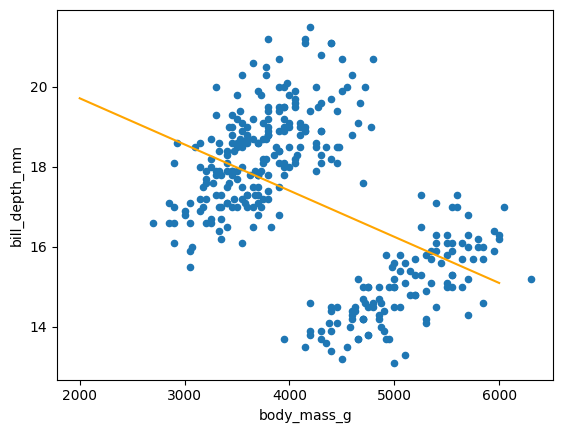

In [11]:
# plotting the actual values of the predictors. the orange line shows the prediction line
X_new = pd.DataFrame()
X_new["body_mass_g"] = np.linspace(2000, 6000, num=1000)
y_new_ = pd.Series(
    body_model.predict(X_new),
    index=X_new["body_mass_g"]
)

dat.plot.scatter(x="body_mass_g", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

**Making a linear model based on body mass and flipper length.**

In [12]:
X_train = dat[["body_mass_g", "flipper_length_mm"]]
y_train = dat["bill_depth_mm"] #this is the target

body2_model = LinearRegression()
body2_model.fit(
    X=X_train,
    y=y_train
)

LinearRegression()

In [13]:
body2_model.coef_, body2_model.intercept_

(array([ 0.0003329 , -0.09787649]), np.float64(35.434286490468665))

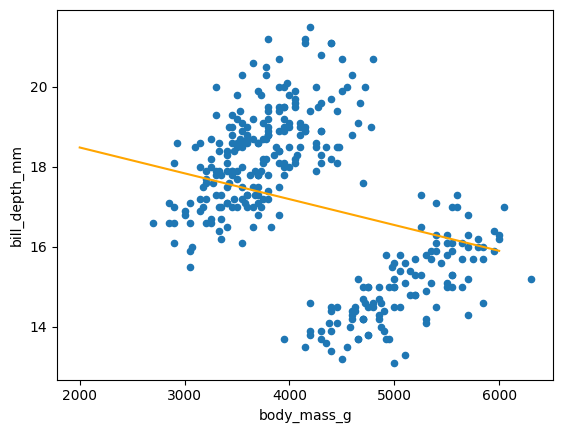

In [14]:
X_new = pd.DataFrame()
X_new["body_mass_g"] = np.linspace(2000, 6000, num=1000)
X_new["flipper_length_mm"] = np.linspace(180, 220, num=1000)
y_new_ = pd.Series(
    body2_model.predict(X_new),
    index=X_new["body_mass_g"]
)

dat.plot.scatter(x="body_mass_g", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

**Making a model using body mass, flipper length, and species.**

In [15]:
X_train = dat[["body_mass_g", "flipper_length_mm", "sex_female", "sex_male"]]
y_train = dat["bill_depth_mm"] #this is the target

body3_model = LinearRegression()
body3_model.fit(
    X=X_train,
    y=y_train
)

LinearRegression()

In [16]:
body3_model.coef_, body3_model.intercept_

(array([-1.00919331e-03, -5.37118388e-02, -1.26946921e+00,  1.26946921e+00]),
 np.float64(32.1934673816359))

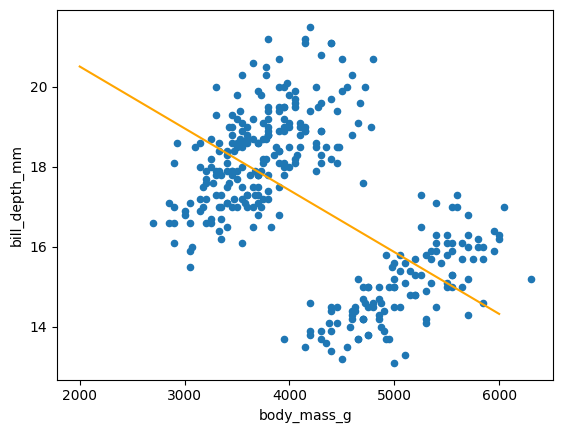

In [17]:
X_new = pd.DataFrame()
X_new["body_mass_g"] = np.linspace(2000, 6000, num=1000)
X_new["flipper_length_mm"] = np.linspace(180, 220, num=1000)
X_new["sex_female"] = np.linspace(0, 1, num=1000)
X_new["sex_male"] = np.linspace(0, 1, num=1000)
y_new_ = pd.Series(
    body3_model.predict(X_new),
    index=X_new["body_mass_g"]
)

dat.plot.scatter(x="body_mass_g", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

**Estimating a model with body mass, flipper length, sex, and species.**

In [18]:
X_train = dat[["body_mass_g", "flipper_length_mm", "sex_female", "sex_male", "species_Adelie", "species_Chinstrap", "species_Gentoo"]]
y_train = dat["bill_depth_mm"] #this is the target

body4_model = LinearRegression()
body4_model.fit(
    X=X_train,
    y=y_train
)

LinearRegression()

In [19]:
body4_model.coef_, body4_model.intercept_

(array([ 5.61194508e-04,  2.21086626e-02, -4.89415249e-01,  4.89415249e-01,
         1.60301781e+00,  1.53475725e+00, -3.13777506e+00]),
 np.float64(10.461446025444165))

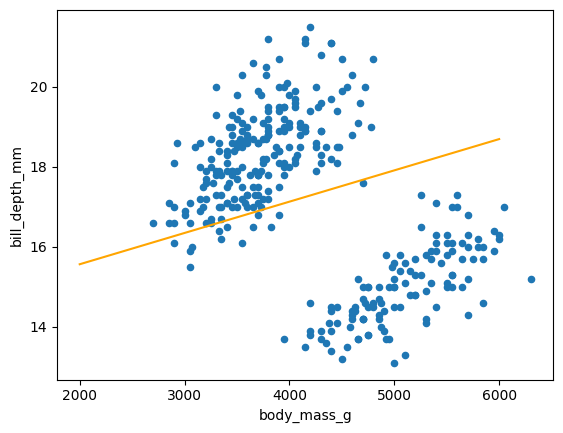

In [20]:
X_new = pd.DataFrame()
X_new["body_mass_g"] = np.linspace(2000, 6000, num=1000)
X_new["flipper_length_mm"] = np.linspace(180, 220, num=1000)
X_new["sex_female"] = np.linspace(0, 1, num=1000)
X_new["sex_male"] = np.linspace(0, 1, num=1000)
X_new["species_Adelie"] = np.linspace(0, 1, num=1000)
X_new["species_Chinstrap"] = np.linspace(0, 1, num=1000)
X_new["species_Gentoo"] = np.linspace(0, 1, num=1000)
y_new_ = pd.Series(
    body4_model.predict(X_new),
    index=X_new["body_mass_g"]
)

dat.plot.scatter(x="body_mass_g", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [21]:
# Calculate the model predictions on the training data.
y_train_ = body_model.predict(X=X_train[["body_mass_g"]]) # a trailing underscore shows the y-hat prediction, while no underscore at the end helps show target y
y_train_

array([17.69247385, 17.63475579, 18.26965451, 18.03878225, 17.80790999,
       17.83676902, 16.62468963, 18.32737258, 17.63475579, 16.94213899,
       17.75019192, 18.03878225, 16.82670286, 18.18307741, 17.17301126,
       18.09650032, 17.86562805, 17.63475579, 17.46160159, 17.63475579,
       17.63475579, 17.92334612, 18.32737258, 18.38509065, 17.46160159,
       18.26965451, 17.51931966, 18.21193645, 17.51931966, 18.18307741,
       17.23072932, 17.46160159, 17.92334612, 18.21193645, 16.65354866,
       18.38509065, 17.51931966, 18.44280871, 16.94213899, 18.55824484,
       16.71126673, 18.06764128, 18.03878225, 17.23072932, 17.98106418,
       17.05757513, 18.03878225, 17.34616546, 18.67368098, 17.75019192,
       17.92334612, 17.63475579, 18.73139904, 17.69247385, 18.38509065,
       16.94213899, 17.86562805, 17.34616546, 18.73139904, 17.46160159,
       18.15421838, 17.28844739, 18.50052678, 16.88442093, 17.86562805,
       17.51931966, 17.92334612, 17.23072932, 17.75019192, 17.11

In [22]:
# We will be using body mass info to predict y-hat, which is the prediction
dat["body_predict"] = y_train_
dat.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,body_predict
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True,17.692474
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False,17.634756
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False,18.269655
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False,18.038782
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True,17.807910


In [23]:
# Calculate the mean-squared error.
mse = ((y_train - y_train_) ** 2).mean()
mse

np.float64(3.0048487628134737)

In [24]:
# Calculate the root mean squared error (RMSE) because the units in mean squared error are now squared. example: blank dollars squared
rmse = np.sqrt(mse)
rmse

np.float64(1.7334499597085211)

In [25]:
# using scikit-learn to compute MSE automatically
from sklearn.metrics import mean_squared_error, root_mean_squared_error

mean_squared_error(y_train, y_train_)

3.0048487628134737

In [26]:
# using scikit-learn to compute RMSE automatically

root_mean_squared_error(y_train, y_train_)

1.7334499597085211

In [27]:
# this is the benchmark to compare to. it is the standard error of the values of y
y_train.std()

1.9692354633199

In [28]:
from sklearn.metrics import mean_absolute_error, r2_score
# finding mean absolute error with scikit
mean_absolute_error(y_train, y_train_)

1.4191571309325648

In [29]:
# finding r squared with scikit
r2_score(y_train, y_train_)

0.22279878346945292

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
# shows the different models

models = {
    "Model 1": ['body_mass_g'],
    "Model 2": ['body_mass_g', 'flipper_length_mm'],
    "Model 3": ['body_mass_g', 'flipper_length_mm', 'sex_female', 'sex_male'],
    "Model 4": ['body_mass_g', 'flipper_length_mm', 'sex_female', 'sex_male', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo']
}
# this is a loop to go through each model and do what you did from scratch with the linear model
# this for loop will define the model, fit the model, plug in all x's to get predictions for that model, compare to observed, average the errrors,
rows = []
for name, Xcols in models.items():
    X_train = dat[Xcols]
    model = LinearRegression().fit(X_train, y_train)
    y_train_ = model.predict(dat[Xcols])
    dat[f"{name}_predict"] = y_train_
    train_mse = mean_squared_error(y_train, y_train_)
    train_r2 = r2_score(y_train, y_train_)
    rows.append({"Model": name, "Train RMSE": train_mse, "Train R2": train_r2})

#this will show the RMSE and R2 so you can choose which model is the best
#Model 5 looks like it is the best because it has the lowest RMSE and the highest R2
# however, we need to still see how it works with data that it has not seen. We risk overfitting if we do not test the model on test data. We want to consider model complexity.
# we need to see how it works on test data and we want to consider model complexity
train_error = pd.DataFrame(rows)
train_error

,Model,Train RMSE,Train R2
0,Model 1,3.004849,0.222799
1,Model 2,2.558481,0.338251
2,Model 3,1.328988,0.656258
3,Model 4,0.622094,0.839096


In [31]:
dat.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,body_predict,Model 1_predict,Model 2_predict,Model 3_predict,Model 4_predict
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True,17.692474,17.692474,18.967008,19.956619,18.660026
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False,17.634756,17.634756,18.494271,17.098662,17.819799
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False,18.269655,18.269655,17.430288,17.170311,17.710120
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False,18.038782,18.038782,17.692621,17.075896,17.778142
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True,17.807910,17.807910,18.052830,19.574132,18.802885


In [37]:
datlong = dat[["body_mass_g", "bill_depth_mm", "Model 1_predict", "Model 2_predict", "Model 3_predict", "Model 4_predict"]]
datlong = datlong.melt(id_vars=["body_mass_g"], value_name = "bill_depth", var_name = "type")
datlong.head()

,body_mass_g,type,bill_depth
0,3750.0,bill_depth_mm,18.7
1,3800.0,bill_depth_mm,17.4
2,3250.0,bill_depth_mm,18.0
3,3450.0,bill_depth_mm,19.3
4,3650.0,bill_depth_mm,20.6


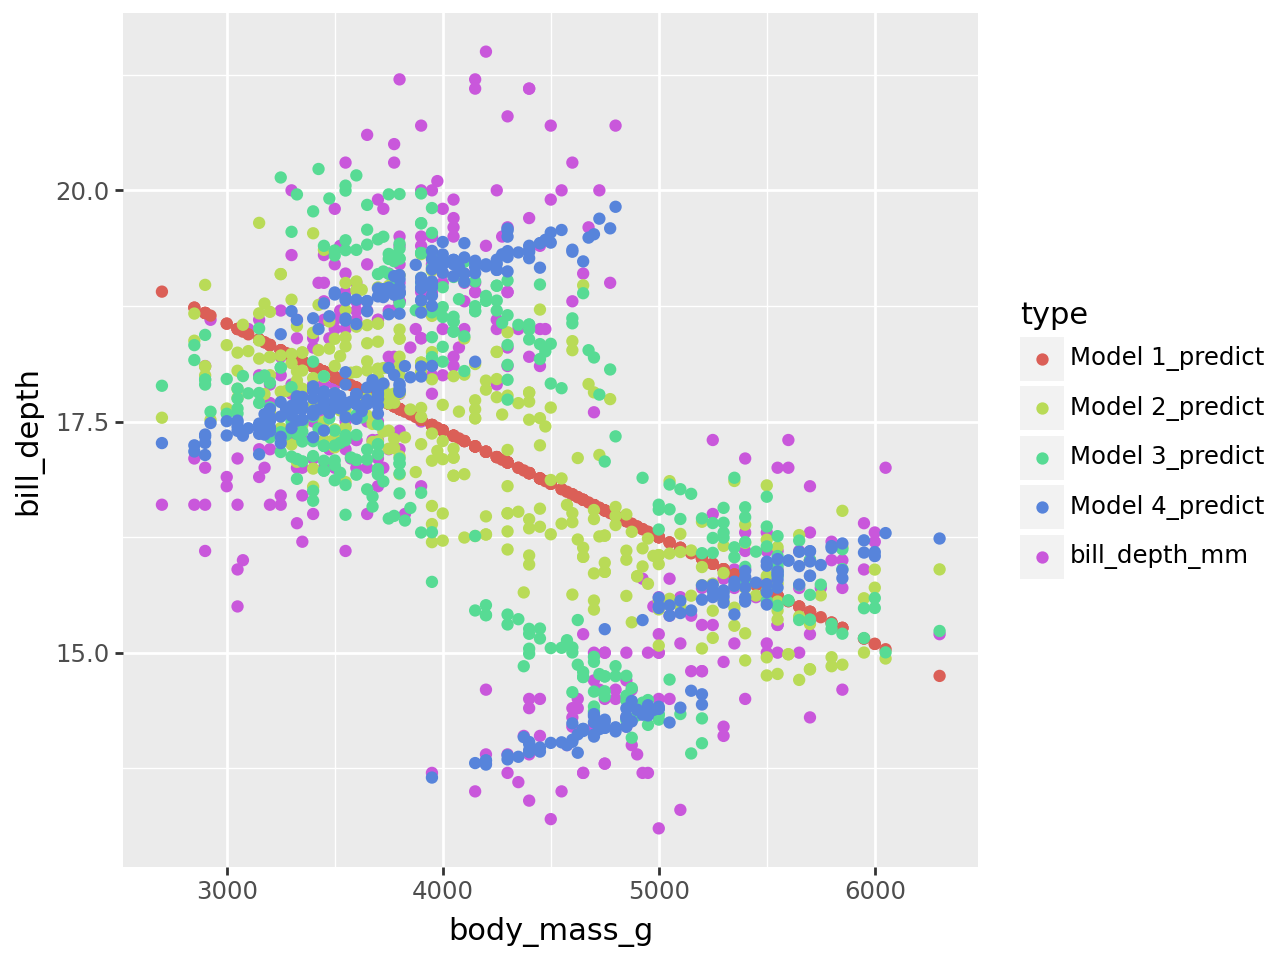

In [38]:
from plotnine import *

(ggplot(datlong,
        aes(x = "body_mass_g",
            y = "bill_depth",
            color = "type")) +
 geom_point())

In [39]:
# taking the data set we have and splitting it into two sets (putting 25% in test set)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dat.drop(['bill_depth_mm'], axis=1), dat['bill_depth_mm'], test_size=0.25)

In [40]:
# this is the training set
X_train.head()

,bill_length_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,body_predict,Model 1_predict,Model 2_predict,Model 3_predict,Model 4_predict
78,36.2,187.0,3550.0,2008,True,False,False,False,False,True,True,False,17.923346,17.923346,18.313170,17.297248,17.701609
54,34.5,187.0,2900.0,2008,True,False,False,True,False,False,True,False,18.673681,18.673681,18.096786,17.953224,17.336833
302,50.5,200.0,3400.0,2008,False,True,False,False,True,False,True,False,18.096500,18.096500,16.990841,16.750373,17.836582
249,46.9,222.0,4875.0,2009,False,False,True,True,False,False,True,False,16.393817,16.393817,15.328582,14.080153,14.478202
49,42.3,191.0,4150.0,2007,True,False,False,False,True,False,False,True,17.230729,17.230729,18.121402,19.015823,19.105591


In [41]:
# these are the y's for the training set
y_train.head()

,bill_depth_mm
78,16.1
54,18.1
302,18.4
249,14.6
49,21.2


In [42]:
# this is the dataset for the test data
X_test.head()

,bill_length_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,body_predict,Model 1_predict,Model 2_predict,Model 3_predict,Model 4_predict
24,38.8,180.0,3800.0,2007,True,False,False,True,False,False,False,True,17.634756,17.634756,19.081530,19.959871,18.665977
70,33.5,190.0,3600.0,2008,True,False,False,False,False,True,True,False,17.865628,17.865628,18.036185,17.085653,17.795995
15,36.6,185.0,3700.0,2007,True,False,False,False,False,True,True,False,17.750192,17.750192,18.558857,17.253293,17.741571
317,46.2,187.0,3650.0,2008,False,True,False,False,True,False,True,False,17.807910,17.807910,18.346459,17.196329,17.689468
82,36.7,187.0,3800.0,2008,True,False,False,False,False,True,True,False,17.634756,17.634756,18.396394,17.044950,17.841908


In [43]:
# these are the y's for the test data set
y_test.head()

,bill_depth_mm
24,17.2
70,19.0
15,17.8
317,17.5
82,18.8


In [44]:
# declaring the model and fitting to the training dataset to a model. Use the training data to train the model
body_model = LinearRegression()
body_model.fit(
    X=X_train[["body_mass_g"]],
    y=y_train
)

LinearRegression()

In [45]:
# Calculate the model predictions on the validation (test) data. Using the test data for the prediction set.
y_test_ = body_model.predict(X=X_test[["body_mass_g"]])
y_test_

array([17.56921482, 17.79749452, 17.68335467, 17.7404246 , 17.56921482,
       17.62628475, 18.02577423, 17.79749452, 16.54195616, 17.05558549,
       17.79749452, 15.7429772 , 16.88437571, 17.28386519, 16.99851557,
       15.2864178 , 16.88437571, 17.39800505, 16.88437571, 15.7429772 ,
       16.02832683, 17.68335467, 18.59647348, 17.45507497, 17.45507497,
       16.94144564, 16.77023586, 18.65354341, 15.62883735, 15.9712569 ,
       16.48488624, 18.11137912, 16.65609601, 16.22807157, 17.79749452,
       15.85711705, 16.62756105, 17.59774979, 15.57176743, 16.82730579,
       17.11265542, 15.40055765, 15.57176743, 17.88309941, 16.5134212 ,
       17.56921482, 17.65481971, 17.34093512, 17.9687043 , 17.68335467,
       17.79749452, 17.9687043 , 16.42781631, 17.16972534, 16.37074638,
       16.14246668, 17.59774979, 17.39800505, 17.59774979, 16.88437571,
       17.62628475, 18.02577423, 15.85711705, 17.56921482, 16.25660653,
       17.56921482, 18.08284415, 17.39800505, 18.31112386, 17.11

In [46]:
# we can compare body_predict to body_mass_g to see how they differ for example
X_test["body_predict"] = y_test_
X_test.head()

,bill_length_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,body_predict,Model 1_predict,Model 2_predict,Model 3_predict,Model 4_predict
24,38.8,180.0,3800.0,2007,True,False,False,True,False,False,False,True,17.569215,17.634756,19.081530,19.959871,18.665977
70,33.5,190.0,3600.0,2008,True,False,False,False,False,True,True,False,17.797495,17.865628,18.036185,17.085653,17.795995
15,36.6,185.0,3700.0,2007,True,False,False,False,False,True,True,False,17.683355,17.750192,18.558857,17.253293,17.741571
317,46.2,187.0,3650.0,2008,False,True,False,False,True,False,True,False,17.740425,17.807910,18.346459,17.196329,17.689468
82,36.7,187.0,3800.0,2008,True,False,False,False,False,True,True,False,17.569215,17.634756,18.396394,17.044950,17.841908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,39.0,185.0,3650.0,2009,True,False,False,False,True,False,False,True,17.740425,17.807910,18.542212,19.842691,18.692342
330,42.5,187.0,3350.0,2009,False,True,False,False,True,False,True,False,18.082844,18.154218,18.246590,17.499087,17.521110
182,47.3,222.0,5250.0,2007,False,False,True,True,False,False,False,True,15.914187,15.960932,15.453419,16.240643,15.667480
305,52.8,205.0,4550.0,2008,False,True,False,False,True,False,False,True,16.713166,16.768985,16.884291,17.860180,19.571329


In [47]:
# Calculate the test mean-squared error.
mse = ((y_test - y_test_) ** 2).mean()
mse

np.float64(2.917244562702002)

In [48]:
mean_squared_error(y_test, y_test_)

2.917244562702002

In [51]:
# estimating the test error for the other models
models = {
    "Model 1": ['body_mass_g'],
    "Model 2": ['body_mass_g', 'flipper_length_mm'],
    "Model 3": ['body_mass_g', 'flipper_length_mm', 'sex_female', 'sex_male'],
    "Model 4": ['body_mass_g', 'flipper_length_mm', 'sex_female', 'sex_male', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo'],
}

rows = []
for name, Xcols in models.items():
    X = X_train[Xcols]
    model = LinearRegression().fit(X, y_train)
    y_test_ = model.predict(X_test[Xcols])
    X_test[f"{name}_predict"] = y_test_
    test_mse = mean_squared_error(y_test, y_test_)
    test_r2 = r2_score(y_test, y_test_)
    rows.append({"Model": name, "Test RMSE": test_mse, "Test R2": test_r2})

test_error = pd.DataFrame(rows)
test_error

,Model,Test RMSE,Test R2
0,Model 1,2.917245,0.201165
1,Model 2,2.686920,0.264235
2,Model 3,1.536238,0.579329
3,Model 4,0.662934,0.818468


In [52]:
df_error = train_error.merge(test_error, on="Model")
df_error

,Model,Train RMSE,Train R2,Test RMSE,Test R2
0,Model 1,3.004849,0.222799,2.917245,0.201165
1,Model 2,2.558481,0.338251,2.686920,0.264235
2,Model 3,1.328988,0.656258,1.536238,0.579329
3,Model 4,0.622094,0.839096,0.662934,0.818468


In [53]:
df_error_long = df_error[["Model", "Train RMSE", "Test RMSE"]].melt(id_vars=["Model"], value_name = "RMSE", var_name = "type")
df_error_long

,Model,type,RMSE
0,Model 1,Train RMSE,3.004849
1,Model 2,Train RMSE,2.558481
2,Model 3,Train RMSE,1.328988
3,Model 4,Train RMSE,0.622094
4,Model 1,Test RMSE,2.917245
5,Model 2,Test RMSE,2.686920
6,Model 3,Test RMSE,1.536238
7,Model 4,Test RMSE,0.662934


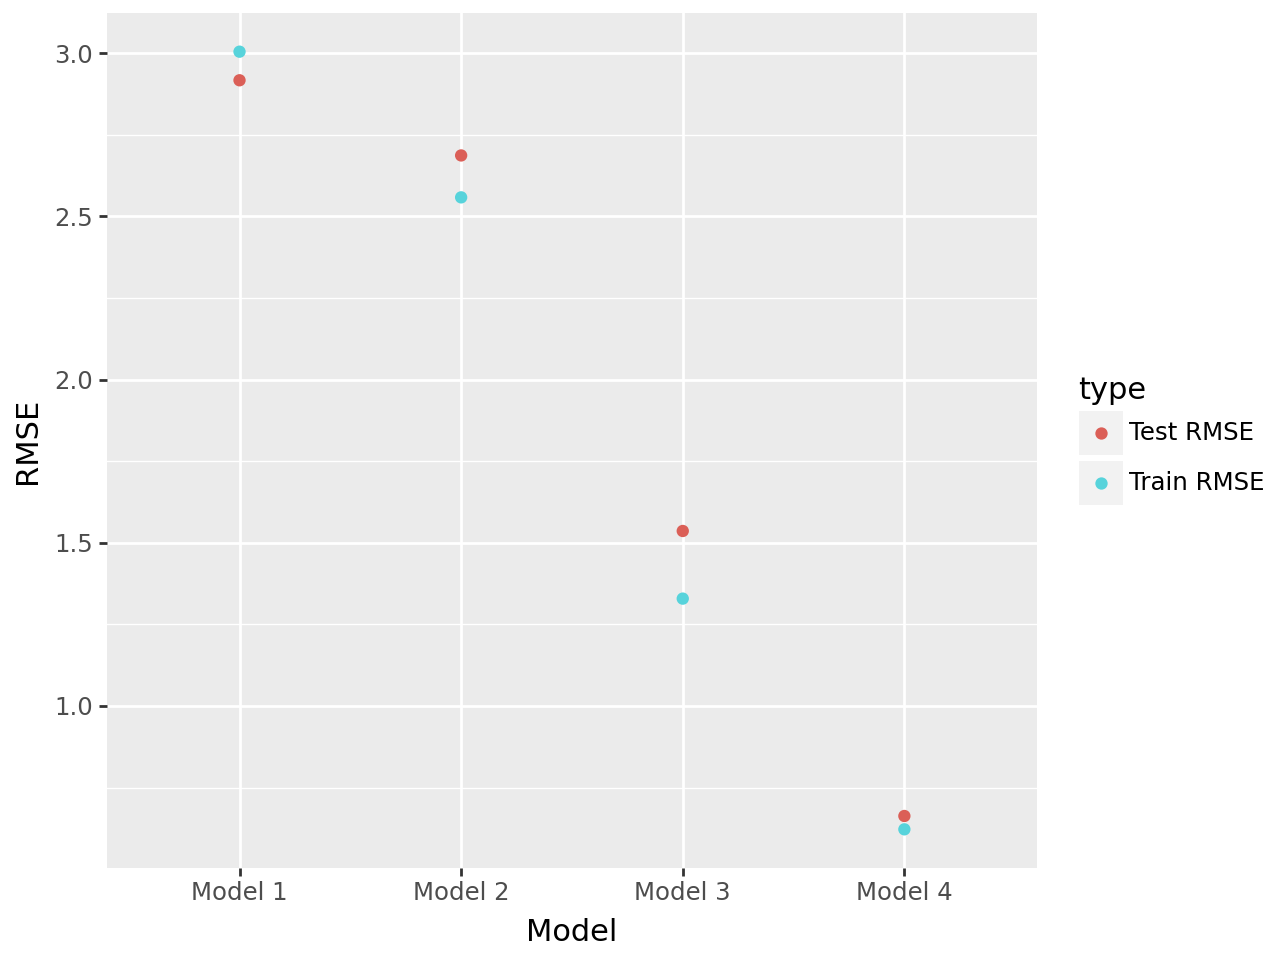

In [54]:
(ggplot(df_error_long,
        aes(x = "Model",
            y = "RMSE",
            color = "type")) +
 geom_point())

Model four seems to be the best model because the RMSE is the smallest and the difference between the test RMSE and train RMSE is the smallest.